<a href="https://colab.research.google.com/github/Hirali04/Antariksh_lect/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [23]:
df=pd.read_csv('/content/1553768847-housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [24]:
df.shape

(20640, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [26]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [27]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20429,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20430,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20431,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
df=pd.get_dummies(df,columns=['ocean_proximity'])
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [31]:
df.shape

(20433, 14)

In [32]:
from sklearn.model_selection import train_test_split
y=df['median_house_value']
x=df.drop(['median_house_value'],axis='columns')
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = Model.predict(X_test)

print(f'R2 Score = {metrics.r2_score(y_test,y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE ={np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

R2 Score = 0.6282997212832133
MAE = 50742.18500542004
MSE = 4973531721.506732
RMSE =70523.27077998249


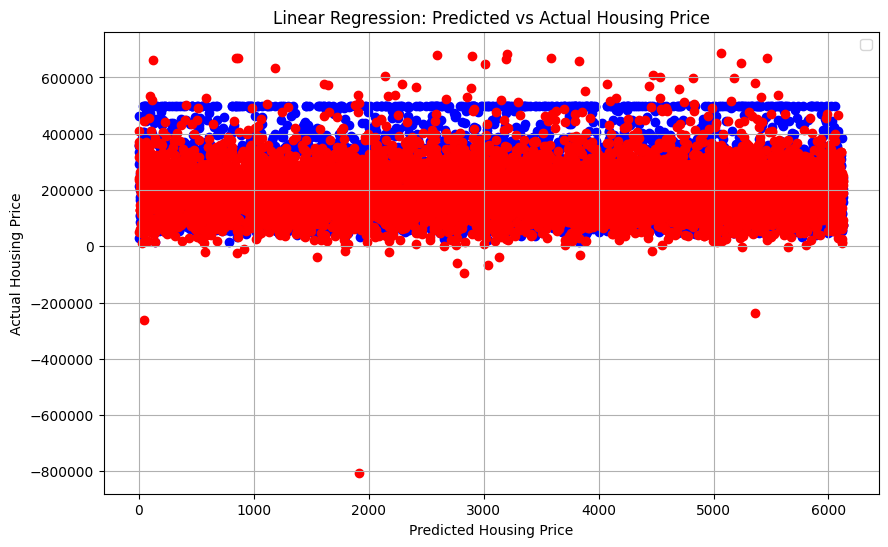

In [36]:

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='blue')
plt.scatter(range(len(y_pred)),y_pred,color='red')

plt.xlabel("Predicted Housing Price")
plt.ylabel("Actual Housing Price")
plt.title("Linear Regression: Predicted vs Actual Housing Price")
plt.legend()
plt.grid(True)
plt.show()

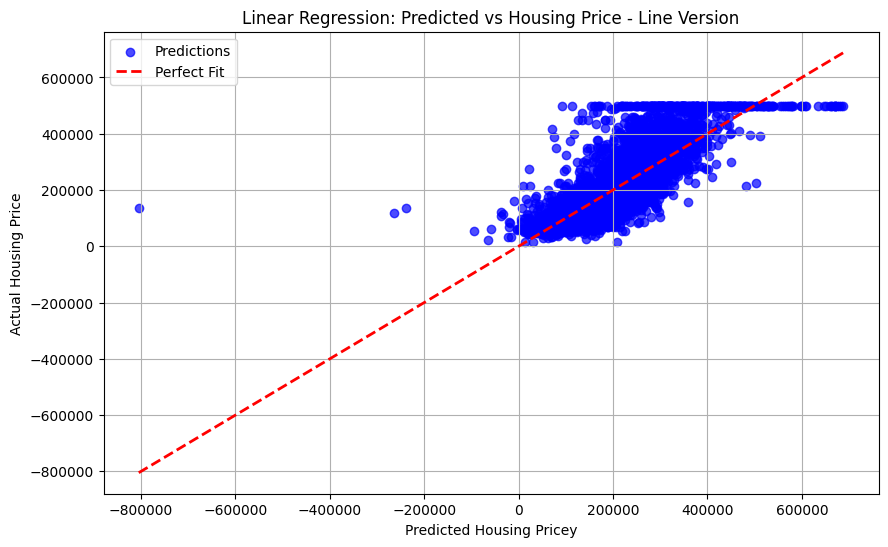

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', marker='o', alpha=0.7, label='Predictions')
plt.plot([min(y_pred), max(y_pred)],
         [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.xlabel("Predicted Housing Pricey")
plt.ylabel("Actual Housing Price")
plt.title("Linear Regression: Predicted vs Housing Price - Line Version")
plt.legend()
plt.grid(True)
plt.show()